In [2]:
import numpy as np
import scipy
from matplotlib import pyplot as plt

def linear_function(matrix, solution_array):
    
    b = matrix.dot(solution_array)

    cond_2norm = np.linalg.cond(matrix)
    cond_inf_norm = np.linalg.cond(matrix, np.inf)
    
    x_computed = np.linalg.solve(matrix,b)

    rel_error = np.linalg.norm(x_computed-solution_array) / np.linalg.norm(solution_array)
    return cond_2norm, cond_inf_norm, rel_error

    
def plot(dimension, condInf, cond2, rel_error):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(dimension,cond2)
    plt.plot(dimension, condInf)
    plt.grid()
    plt.title('Condition Number')
    plt.legend(['2-Norm', 'Inf-Norm'])
    plt.subplot(1,2,2)
    plt.plot(dimension, rel_error)
    plt.title('Relative error')
    plt.grid()
    plt.show()

#### Random matrix 

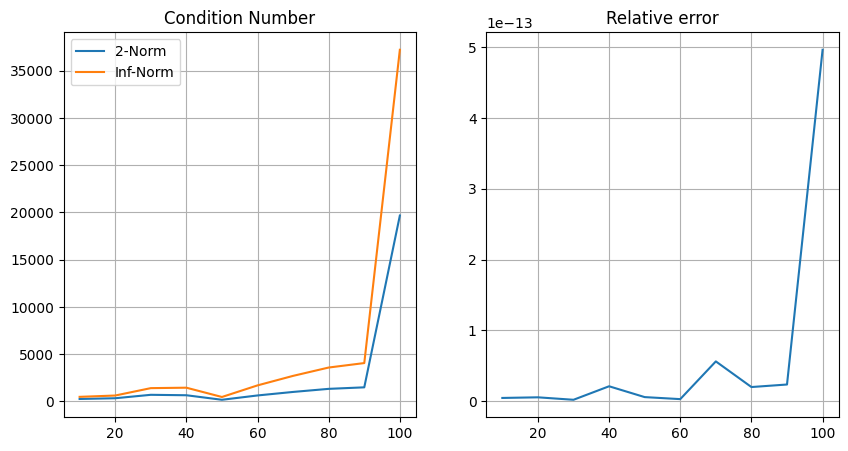

In [3]:
dim=np.arange(10,110,10,int)
cond_2_list=[]
cond_inf_list=[]
rel_errors=[]

inf_norms = []
two_norms = []

two_norms_inv = []
inf_norms_inv = []
for el in dim:
    
    A = np.random.rand(el,el)

    two_norms.append(np.linalg.norm(A))
    inf_norms.append(np.linalg.norm(A, np.inf))

    two_norms_inv.append(np.linalg.norm(np.linalg.inv(A)))
    inf_norms_inv.append(np.linalg.norm(np.linalg.inv(A), np.inf))

    x_true=np.ones(el)

    cond_2norm, cond_inf_norm, rel_error= linear_function(A, x_true)
    cond_2_list.append(cond_2norm)
    cond_inf_list.append(cond_inf_norm)
    rel_errors.append(rel_error)
    
plot(dim, cond_inf_list, cond_2_list, rel_errors)

#### Vander matrix

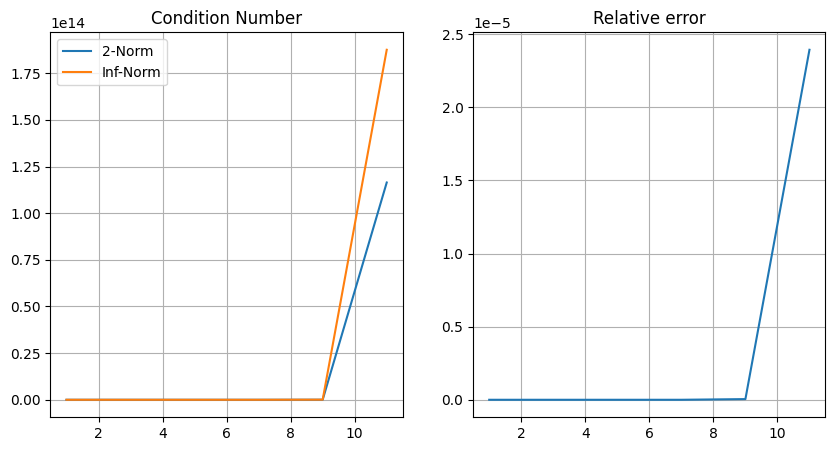

In [4]:
dim=np.arange(1,12,2,int)
cond_2_list=[]
cond_inf_list=[]
rel_errors=[]

inf_norms = []
two_norms = []

two_norms_inv = []
inf_norms_inv = []
for el in dim:
    x_true=np.ones(el)
    x = np.arange(1,el+1,1, dtype=np.float64)
    V = np.vander(x)
    
    two_norms.append(np.linalg.norm(V))
    inf_norms.append(np.linalg.norm(V, np.inf))

    
    two_norms_inv.append(np.linalg.norm(np.linalg.inv(A)))
    inf_norms_inv.append(np.linalg.norm(np.linalg.inv(A), np.inf))

    cond_2norm, cond_inf_norm, rel_error= linear_function(V, x_true)
    cond_2_list.append(cond_2norm)
    cond_inf_list.append(cond_inf_norm)
    rel_errors.append(rel_error)
plot(dim, cond_inf_list, cond_2_list, rel_errors)

#### Note on computation

In [5]:
base = 1000000
exp = 100
print("Integer aritmentic {}^{} = {}".format(base, exp, np.power(base, exp)))


base ** exp
print('Float arithmetic {}^{} = {}'.format(base, exp, np.power(float(base), float(exp))))

Integer aritmentic 1000000^100 = 0
Float arithmetic 1000000^100 = inf


C:\Users\Kilian\AppData\Local\Temp\ipykernel_5972\2686856105.py:7: RuntimeWarning: overflow encountered in power
  print('Float arithmetic {}^{} = {}'.format(base, exp, np.power(float(base), float(exp))))


In [6]:
v = np.vander([1,2,3,4,5,6])
h = scipy.linalg.hilbert(6)
print("Vander \n{}".format(v))
print("Vander inv \n{}".format(np.linalg.inv(v)))
print("Hilbert \n{}".format(h))
print("Hilbert inv \n{}".format(np.linalg.inv(h)))

Vander 
[[   1    1    1    1    1    1]
 [  32   16    8    4    2    1]
 [ 243   81   27    9    3    1]
 [1024  256   64   16    4    1]
 [3125  625  125   25    5    1]
 [7776 1296  216   36    6    1]]
Vander inv 
[[-8.33333333e-03  4.16666667e-02 -8.33333333e-02  8.33333333e-02
  -4.16666667e-02  8.33333333e-03]
 [ 1.66666667e-01 -7.91666667e-01  1.50000000e+00 -1.41666667e+00
   6.66666667e-01 -1.25000000e-01]
 [-1.29166667e+00  5.70833333e+00 -1.00833333e+01  8.91666667e+00
  -3.95833333e+00  7.08333333e-01]
 [ 4.83333333e+00 -1.92083333e+01  3.10000000e+01 -2.55833333e+01
   1.08333333e+01 -1.87500000e+00]
 [-8.70000000e+00  2.92500000e+01 -4.23333333e+01  3.30000000e+01
  -1.35000000e+01  2.28333333e+00]
 [ 6.00000000e+00 -1.50000000e+01  2.00000000e+01 -1.50000000e+01
   6.00000000e+00 -1.00000000e+00]]
Hilbert 
[[1.         0.5        0.33333333 0.25       0.2        0.16666667]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.33333333 0.25       0.2

#### Hilbert matrix

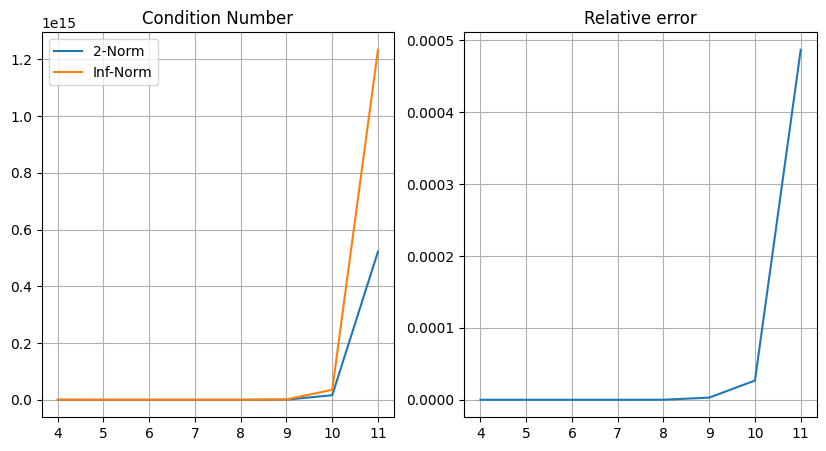

In [7]:
import scipy 
import scipy.linalg

inf_norms = []
two_norms = []

dim=np.arange(4,12, 1, np.int32)
cond_2_list=[]
cond_inf_list=[]
rel_errors=[]
for el in dim:
    H = scipy.linalg.hilbert(el)
    x_true = np.ones(el)
    
    inf_norms.append(np.linalg.norm(H, np.inf))
    two_norms.append(np.linalg.norm(H))

    cond_2norm, cond_inf_norm, rel_error = linear_function(H, x_true)
    cond_2_list.append(cond_2norm)
    cond_inf_list.append(cond_inf_norm)
    rel_errors.append(rel_error)
plot(dim, cond_inf_list, cond_2_list, rel_errors)

In [8]:
#Floating point part

#Computation of epsilon 

x= np.float32(1)
y = np.float64(1)
def machine_precision(val, dtype):
    one = dtype(1)
    while (one + val != one):
        if one + val == one:
            break
        val /= dtype(2)
    return val
print("32 bits floating point machine precision : {}".format(machine_precision(x, np.float32))) 
print("64 bits floating point machine precision : {}".format(machine_precision(y, np.float64)))  

32 bits floating point machine precision : 5.960464477539063e-08
64 bits floating point machine precision : 1.1102230246251565e-16


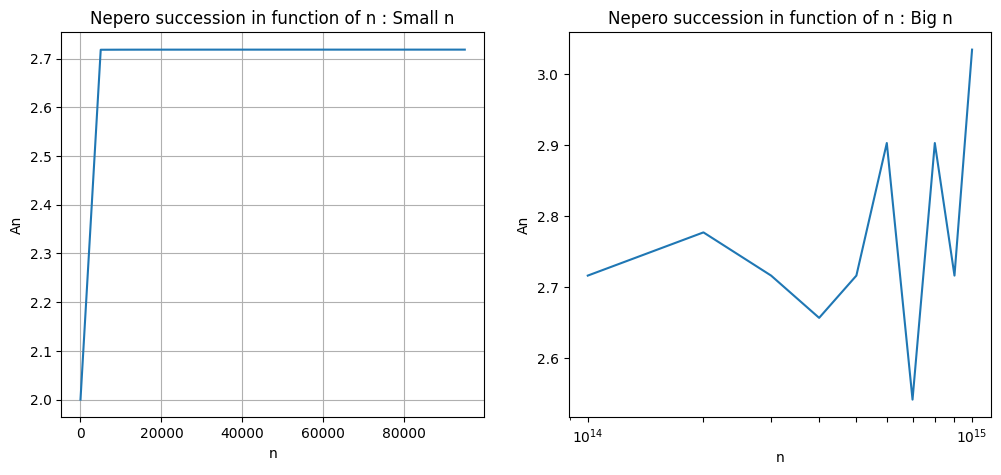

In [9]:
n_values = np.arange(1,100000,5000, dtype = np.float64)
an = []
anBig = []
for n in n_values:
    an.append((np.float64(1) + np.float64(1) / n)**n)

exponents = np.arange(14, 22,1, np.float64)
num = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

new_values = num * np.power(10.0, 14.0)

for value in new_values:
    limit = (np.float64(1) + np.float64(1) / value)**value 
    anBig.append(limit)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xlabel("n")
plt.ylabel("An")
plt.grid()
plt.title("Nepero succession in function of n : Small n")
plt.plot(n_values, an)

plt.subplot(1,2,2)
plt.ylabel("An")
plt.xscale('log')
plt.xlabel("n")
plt.xticks(new_values)
plt.title("Nepero succession in function of n : Big n")
plt.plot(new_values, anBig)
plt.show()

In [10]:
A=np.array([[4,2],[1,3]])
B=np.array([[4,2],[2,1]])
rank_a=np.linalg.matrix_rank(A)
rank_b=np.linalg.matrix_rank(B)


eig_a=np.linalg.eigvals(A)
eig_b=np.linalg.eigvals(B)


print ("Ranks\nrk(A) = {}\nrk(B) = {}".format(rank_a, rank_b))

print('Eig(A) = {}\nEig(B) = {}'.format(eig_a, eig_b))



A = np.array(
    [
        [1,2,3], [2,4,6], [3,6,9]
    ]
)
rank_a = np.linalg.matrix_rank(A)

eigen_a = np.linalg.eigvals(A)
print("Eig of A : {}\nRank(A) = {}".format(eigen_a, rank_a)) 

Ranks
rk(A) = 2
rk(B) = 1
Eig(A) = [5. 2.]
Eig(B) = [5. 0.]
Eig of A : [ 1.40000000e+01  2.58591657e-16 -5.28378741e-16]
Rank(A) = 1
